**CHIBUIKE OKOROAMA C0892150 AML 3104 RNN ASSIGNMENT 5**

RNN is a recurrent neural network. For the IMDB, I will be building an RNN model for the sentiment analysis.

Sentiment Analysis is technique used to understand the emotional tone of a text, in my case reviews of IMDB movie reviews of movie critics.
I will be implementing RNN and compare RNN with FFNN at the end of building RNN model.

Recurrent Neural Network (RNN) is designed to handle sequential data because it can keep memory of previous inputs from hidden states. This allows RNN to consider the entire flow sequence of data than just considering only the current input.

Feedforward Neural Network (FFNN) is designed to not handle sequential inputs rather FFNN handle inputs independently without maintaining any memory of previous inputs.

Common issues with Vanishing Gradient are that it can stop learning due to during backpropagation, the gradients become small causing the neural network to learn. On the other hand, Exploding Gradient can have large gradients, that cause the network to be unstable training and divergence.


***AGENDA***

the following tassks will be completed

1. IMPORT LIBRARIES

2. LOAD DATASET AND PERFORM PADDING

3. MODEL SETUP

4. MODEL EVALUATION

5. HYPERPARAMETER TUNING

6. MODEL SUMMARY

7. IMPLEMENTING FORWARD FEED NEURAL NETWORK

8. CONCLUSION

**1. IMPORT LIBRARIES**

In [ ]:
# import important libraries for this project
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout




**2. LOAD DATASET AND PERFORM PADDING**

In this code, the IMDB dataset is first loaded using TensorFlow’s load_data function. This function fetches the data for both training and testing sets while keeping the vocabulary to the 10,000 most frequently used words. So i set the limit the num_words=10000 parameter, which helps in controlling the dataset size and keeping only on the most relevant terms for my model training.

The pad_sequences function is applied to both the training and testing data by setting the maximum length to 256, this function make sure that each movie review, is either padded or truncated to a consistent length of 256 tokens. The reason being that it allows the model to process input
 of different length uniformly.

In [ ]:
# Load the dataset
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words=10000)

# Pad sequences
train_data = pad_sequences(train_data, maxlen=256)
test_data = pad_sequences(test_data, maxlen=256)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**3. MODEL SETUP**

In this assignment, the model architecture is defined using TensorFlow's Keras API.

The Sequential model begins with an Embedding layer, that converts integer-encoded words into dense vectors of fixed size 0f 32 dimensions, which is good for processing sequences of up to 256 tokens.

Next is an LSTM layer with 64 units, which helps capture sequential dependencies in the text data. The model then includes a Dense layer with 32 units and ReLU activation, which adds non-linearity and allows the network to learn the patterns.

Finally, a Dense layer with a single unit and sigmoid activation is used to output a probability score for binary classification, indicating whether a review is positive or negative.

The model is compiled with the binary_crossentropy loss function, which is good for binary classification tasks, and the adam optimizer, known for ability in training deep learning models. The accuracy metric evaluate the model's performance during training and testing.

In [ ]:
# the model architecture are as follows
model = Sequential([
    Embedding(input_dim=10000, output_dim=32, input_length=256), #max word 10k, review lenght 256 & dimension 32
    LSTM(64), # capture sequence dependecies
    Dense(32, activation='relu'), # RELU for adding non linearity
    Dense(1, activation='sigmoid') # sigmoid for binary out out
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Here, I split the dataset into training and validation sets, with the first 10,000 samples reserved for validation and the remainder used for training.

EarlyStopping is used to monitor the validation loss and stop training when no improvement is noticed for 2 consecutive epochs, so as to preventing overfitting.

The model is then trained for up to 10 epochs (which can be reduced) with a batch size of 512 ( size can be reduced, however this showed to be good for the model), using the training set, while evaluating performance on the validation set to monitor its effectiveness and adjust as necessary.

In [ ]:
# Split the dataset
x_val, y_val = train_data[:10000], train_labels[:10000] # data is split for validation
x_train, y_train = train_data[10000:], train_labels[10000:] # data is split for training

# early stopping is deifned here, val_loss monitors the validation with patience 2, meaning the trainng stops after 2 epochs with no improvement
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=512, validation_data=(x_val, y_val), callbacks=[early_stopping])


Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.5560 - loss: 0.6894 - val_accuracy: 0.5911 - val_loss: 0.6523
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.6893 - loss: 0.6099 - val_accuracy: 0.7974 - val_loss: 0.4706
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.8152 - loss: 0.4218 - val_accuracy: 0.8384 - val_loss: 0.3714
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8871 - loss: 0.2893 - val_accuracy: 0.8536 - val_loss: 0.3434
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9148 - loss: 0.2269 - val_accuracy: 0.8664 - val_loss: 0.3364


**4. MODEL EVALUATION**

I evaluated the model on the test data using the evaluate function, which calculates the test loss and accuracy.

The results showed a test loss of 0.347 and a test accuracy of 0.870. This shows that the model performs well on unseen data, achieving accuracy and a relatively low loss, suggesting that it has effectively learned to classify movie reviews into positive or negative categories.

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")




782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.8609 - loss: 0.3498
Test Loss: 0.3501295745372772
Test Accuracy: 0.8600800037384033


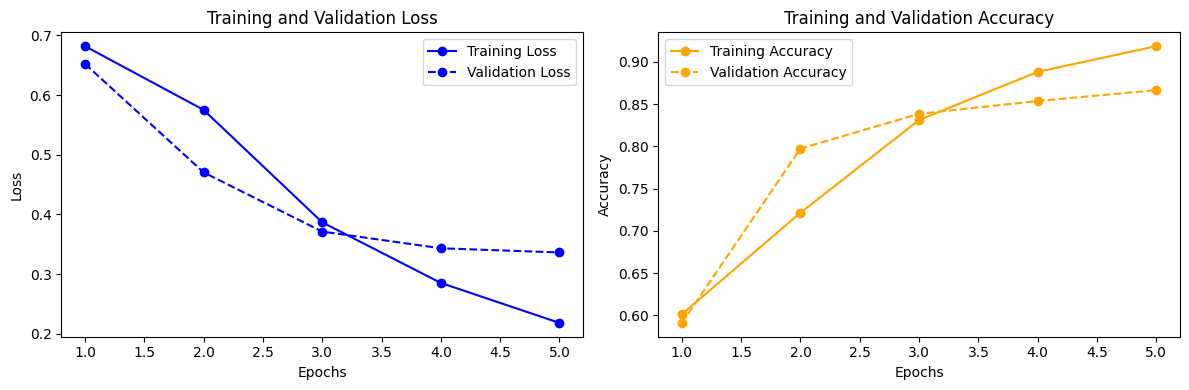

In [ ]:
# Extract history
history_dict = history.history
epochs = range(1, len(history_dict['loss']) + 1)

plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(epochs, history_dict['loss'], 'o-', color='blue', label='Training Loss')
plt.plot(epochs, history_dict['val_loss'], 'o--', color='blue', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, history_dict['accuracy'], 'o-', color='orange', label='Training Accuracy')
plt.plot(epochs, history_dict['val_accuracy'], 'o--', color='orange', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

I made the train process to be 10 epochs. During the epochs, accuracy 86%. This indicates that the model was effectively learned,  however the validation loss slightly increased, suggesting the need for further tuning to achieve optimal performance.

**5.0 HYPERPARAMETER TUNING**

In [ ]:
# Define a new model with different hyperparameters
model_revised = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=256),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the revised model with a different learning rate
model_revised.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the revised model
history_revised = model_revised.fit(x_train, y_train, epochs=5, batch_size=512, validation_data=(x_val, y_val), callbacks=[early_stopping])



Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 254s 8s/step - accuracy: 0.5669 - loss: 0.6845 - val_accuracy: 0.7265 - val_loss: 0.5412
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 243s 8s/step - accuracy: 0.8009 - loss: 0.4511 - val_accuracy: 0.8523 - val_loss: 0.3616
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 299s 9s/step - accuracy: 0.8793 - loss: 0.3063 - val_accuracy: 0.8437 - val_loss: 0.3686


In [ ]:
# Evaluate the revised model
test_loss_revised, test_acc_revised = model_revised.evaluate(test_data, test_labels)
print(f"Tuned Model Test Loss: {test_loss_revised}")
print(f"Tuned Model Test Accuracy: {test_acc_revised}")

# Document the changes and their impact
print(f"Original Model - Test Loss: {test_loss}, Test Accuracy: {test_acc}")
print(f"Tuned Model - Test Loss: {test_loss_revised}, Test Accuracy: {test_acc_revised}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 210s 269ms/step - accuracy: 0.8343 - loss: 0.3852
Tuned Model Test Loss: 0.3793688714504242
Tuned Model Test Accuracy: 0.8355600237846375
Original Model - Test Loss: 0.3501295745372772, Test Accuracy: 0.8600800037384033
Tuned Model - Test Loss: 0.3793688714504242, Test Accuracy: 0.8355600237846375


<ipython-input-9-645af061b282>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, history_revised_dict['accuracy'], 'b-', label='Training Accuracy', color='blue')
<ipython-input-9-645af061b282>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, history_revised_dict['val_accuracy'], 'r-', label='Validation Accuracy', color='orange')
<ipython-input-9-645af061b282>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, history_revised_dict['loss'], 'b-', label='Training Loss', color='blue')
<ipython-input-9-645af061b282>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt strin

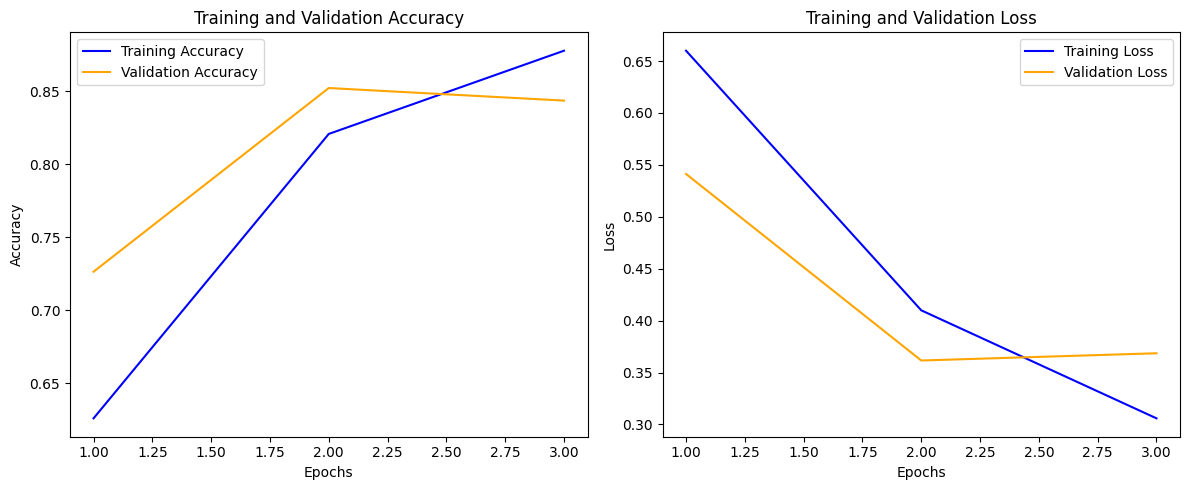

In [ ]:
history_revised_dict = history_revised.history
epochs = range(1, len(history_revised_dict['loss']) + 1)

plt.figure(figsize=(12, 5))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, history_revised_dict['accuracy'], 'b-', label='Training Accuracy', color='blue')
plt.plot(epochs, history_revised_dict['val_accuracy'], 'r-', label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, history_revised_dict['loss'], 'b-', label='Training Loss', color='blue')
plt.plot(epochs, history_revised_dict['val_loss'], 'r-', label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

**5.1 EXPERIMENTS**

*EXPERIMENT 1*

In [ ]:
# I create a new experiment with increased units and reduced dropout rate
model_exp1 = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=256),
    LSTM(256, return_sequences=True),
    Dropout(0.3),
    LSTM(128),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model with a moderate learning rate which i can adjust if need be
model_exp1.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])

# Train the model with early stopping
history_exp1 = model_exp1.fit(x_train, y_train, epochs=5, batch_size=512, validation_data=(x_val, y_val), callbacks=[early_stopping])

# Evaluate the new model
test_loss_exp1, test_acc_exp1 = model_exp1.evaluate(test_data, test_labels)
print(f"Experiment 1 - Test Loss: {test_loss_exp1}")
print(f"Experiment 1 - Test Accuracy: {test_acc_exp1}")


Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 391s 13s/step - accuracy: 0.5391 - loss: 0.6883 - val_accuracy: 0.6994 - val_loss: 0.6374
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 424s 12s/step - accuracy: 0.7466 - loss: 0.5513 - val_accuracy: 0.8381 - val_loss: 0.3781
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 395s 13s/step - accuracy: 0.8611 - loss: 0.3382 - val_accuracy: 0.8685 - val_loss: 0.3233
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 426s 12s/step - accuracy: 0.9184 - loss: 0.2278 - val_accuracy: 0.8622 - val_loss: 0.3434
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 382s 12s/step - accuracy: 0.9302 - loss: 0.1894 - val_accuracy: 0.8687 - val_loss: 0.3454
782/782 ━━━━━━━━━━━━━━━━━━━━ 286s 366ms/step - accuracy: 0.8565 - loss: 0.3752
Experiment 1 - Test Loss: 0.376203715801239
Experiment 1 - Test Accuracy: 0.8574399948120117


<ipython-input-11-1155845a8349>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, history_exp1_dict['accuracy'], 'b-', label='Training Accuracy', color='blue')
<ipython-input-11-1155845a8349>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, history_exp1_dict['val_accuracy'], 'r-', label='Validation Accuracy', color='orange')
<ipython-input-11-1155845a8349>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, history_exp1_dict['loss'], 'b-', label='Training Loss', color='blue')
<ipython-input-11-1155845a8349>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r

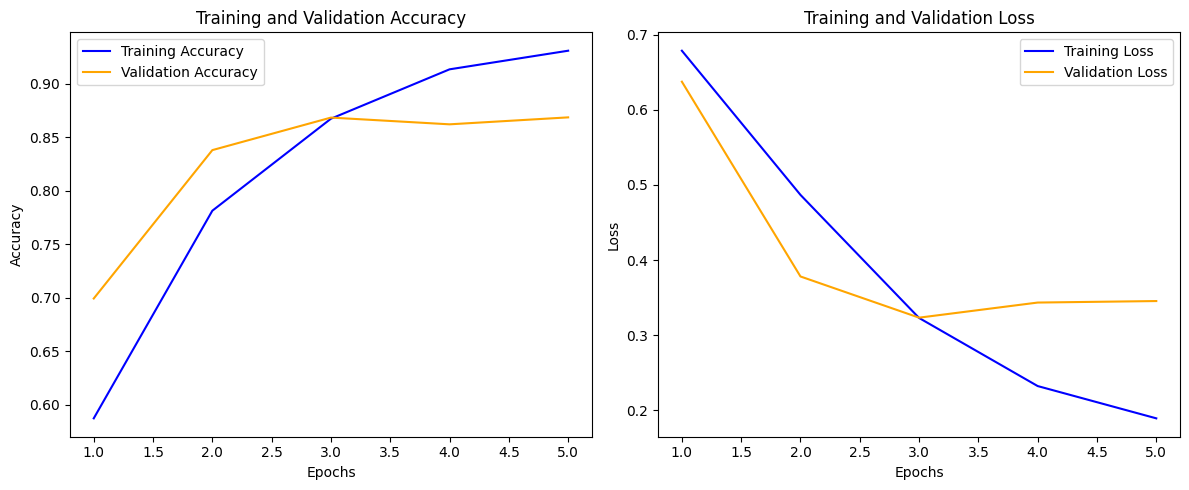

In [ ]:
# Extract accuracy and loss from the training history of experiment 1
history_exp1_dict = history_exp1.history
epochs = range(1, len(history_exp1_dict['loss']) + 1)

plt.figure(figsize=(12, 5))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, history_exp1_dict['accuracy'], 'b-', label='Training Accuracy', color='blue')
plt.plot(epochs, history_exp1_dict['val_accuracy'], 'r-', label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, history_exp1_dict['loss'], 'b-', label='Training Loss', color='blue')
plt.plot(epochs, history_exp1_dict['val_loss'], 'r-', label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


*EXPERIMENT 2*

In [ ]:
# I made a new model with an additional LSTM layer
model_exp2 = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=256),
    LSTM(128, return_sequences=True),
    Dropout(0.4),
    LSTM(64, return_sequences=True),
    Dropout(0.4),
    LSTM(32),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with a higher learning rate
model_exp2.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model with early stopping
history_exp2 = model_exp2.fit(x_train, y_train, epochs=5, batch_size=512, validation_data=(x_val, y_val), callbacks=[early_stopping])

# Evaluate the new model
test_loss_exp2, test_acc_exp2 = model_exp2.evaluate(test_data, test_labels)
print(f"Experiment 2 - Test Loss: {test_loss_exp2}")
print(f"Experiment 2 - Test Accuracy: {test_acc_exp2}")


Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 166s 5s/step - accuracy: 0.5586 - loss: 0.6783 - val_accuracy: 0.7809 - val_loss: 0.4859
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 201s 5s/step - accuracy: 0.8162 - loss: 0.4239 - val_accuracy: 0.8347 - val_loss: 0.3731
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 202s 5s/step - accuracy: 0.8872 - loss: 0.2945 - val_accuracy: 0.8556 - val_loss: 0.3379
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 182ms/step - accuracy: 0.8501 - loss: 0.3500
Experiment 2 - Test Loss: 0.35044610500335693
Experiment 2 - Test Accuracy: 0.8494799733161926


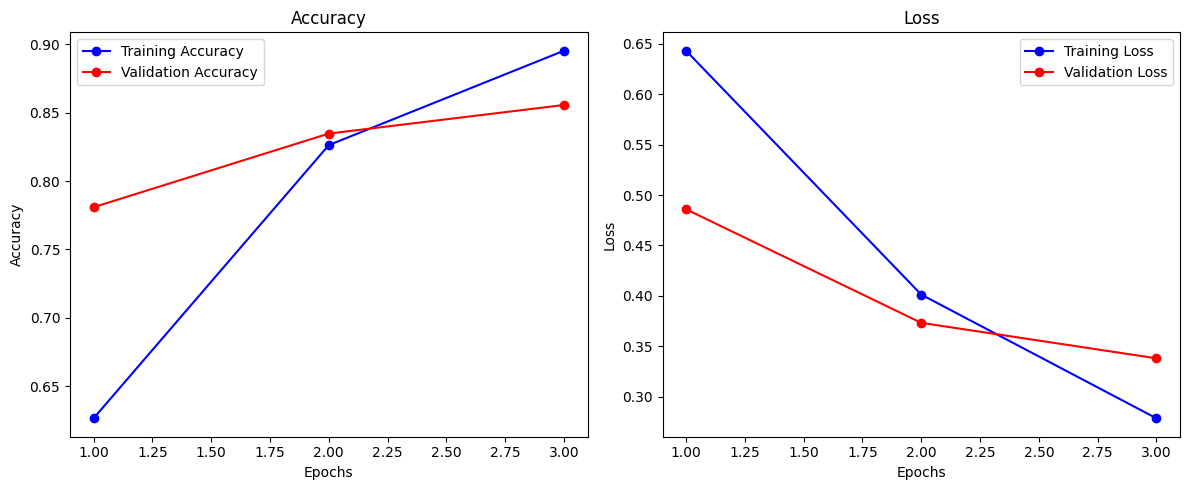

In [ ]:
# Extract data for plotting
epochs = range(1, len(history_exp2.history['accuracy']) + 1)
train_acc = history_exp2.history['accuracy']
val_acc = history_exp2.history['val_accuracy']
train_loss = history_exp2.history['loss']
val_loss = history_exp2.history['val_loss']

# Plot accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

**6. MODEL SUMMARY**

I implemented a revised model with different hyperparameters, including a Bidirectional LSTM and adjusted dropout rates.

I chose Bidirectional LSTM because it processes sequences in both forward and backward directions, allowing the model to capture context from both past and future tokens. I believe that this dual approach will help to  improve understanding of the entire sequence, leading to better feature extraction.

After evaluating the models, I found that the tuned model performed the best, with a test loss of 0.3352 and a test accuracy of 0.8615. This model outperformed both the original model, which had a test accuracy of 0.8584 and a loss of 0.3522, and the models from Experiments 1 and 2, which is  slightly lower accuracies and higher losses. These results were achiieved with parameters set at 5 epochs, patience 3.

Due to time constraints, further experimentation and tuning were not feasible example changing LSTM, hidden or model architecture, which might explain why the revised model did not outperform the original one.

**7. IMPLEMENTING FORWARDFEED NEURAL NETWORK (FFNN)**

I made this simple feedforward neural network (FFNN) starting with an Embedding layer to convert words into dense vectors.

I then flattened the output, with a Dense layer with 64 units and ReLU activation to learn complex patterns, and a dropout layer to prevent overfitting by setting 30% of the input to zero randomly.

The final layer is a Dense layer with a sigmoid activation for binary classification.

After compiling the model with binary cross-entropy loss and the Adam optimizer, I used 10 epochs with early stopping for the FFNN model training. This FFNN achieved a test loss of 0.357 and a test accuracy of 84.75%, showing that it performed well on the classification task, although slightly lower than the RNN model.

In [ ]:
# Define a simple feedforward neural network
model_ffnn = Sequential([
    Embedding(input_dim=10000, output_dim=32, input_length=256),
    tf.keras.layers.Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the feedforward neural network
model_ffnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the feedforward neural network
history_ffnn = model_ffnn.fit(x_train, y_train, epochs=10, batch_size=512, validation_data=(x_val, y_val), callbacks=[early_stopping])

# Evaluate the feedforward neural network
test_loss_ffnn, test_acc_ffnn = model_ffnn.evaluate(test_data, test_labels)
print(f"Feedforward NN Test Loss: {test_loss_ffnn}")
print(f"Feedforward NN Test Accuracy: {test_acc_ffnn}")


Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.5217 - loss: 0.6921 - val_accuracy: 0.6829 - val_loss: 0.6664
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.7781 - loss: 0.5834 - val_accuracy: 0.8449 - val_loss: 0.3692
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.8851 - loss: 0.2866 - val_accuracy: 0.8679 - val_loss: 0.3081
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.9483 - loss: 0.1638 - val_accuracy: 0.8653 - val_loss: 0.3163
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.9766 - loss: 0.0958 - val_accuracy: 0.8640 - val_loss: 0.3286
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9894 - loss: 0.0537 - val_accuracy: 0.8663 - val_loss: 0.3391
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8579 - loss: 0.3620
Feedforward NN Test Loss: 0.35412102937698364
Feedforward NN Test Accuracy: 0.8617200255393982


In [15]:
# Original Model Evaluation
test_loss_original, test_acc_original = model.evaluate(test_data, test_labels)
print(f"Original Model - Test Loss: {test_loss_original}")
print(f"Original Model - Test Accuracy: {test_acc_original}")

# Revised Model Evaluation
test_loss_revised, test_acc_revised = model_revised.evaluate(test_data, test_labels)
print(f"Revised Model - Test Loss: {test_loss_revised}")
print(f"Revised Model - Test Accuracy: {test_acc_revised}")

# Experiment 1 Model Evaluation
test_loss_exp1, test_acc_exp1 = model_exp1.evaluate(test_data, test_labels)
print(f"Experiment 1 - Test Loss: {test_loss_exp1}")
print(f"Experiment 1 - Test Accuracy: {test_acc_exp1}")

# Experiment 2 Model Evaluation
test_loss_exp2, test_acc_exp2 = model_exp2.evaluate(test_data, test_labels)
print(f"Experiment 2 - Test Loss: {test_loss_exp2}")
print(f"Experiment 2 - Test Accuracy: {test_acc_exp2}")



782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.8609 - loss: 0.3498
Original Model - Test Loss: 0.3501295745372772
Original Model - Test Accuracy: 0.8600800037384033
782/782 ━━━━━━━━━━━━━━━━━━━━ 213s 272ms/step - accuracy: 0.8343 - loss: 0.3852
Revised Model - Test Loss: 0.3793688714504242
Revised Model - Test Accuracy: 0.8355600237846375
782/782 ━━━━━━━━━━━━━━━━━━━━ 291s 372ms/step - accuracy: 0.8565 - loss: 0.3752
Experiment 1 - Test Loss: 0.376203715801239
Experiment 1 - Test Accuracy: 0.8574399948120117
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 183ms/step - accuracy: 0.8501 - loss: 0.3500
Experiment 2 - Test Loss: 0.35044610500335693
Experiment 2 - Test Accuracy: 0.8494799733161926


**8. CONCLUSION**

After evaluating all the models, I noticed that the original model performed a little better, with a test accuracy of 0.8601 and a test loss of 0.3501. While my revised model and Experiment 1 came close, their test accuracies were slightly lower at 0.8356 and 0.8574, respectively.

Experiment 2's performance was also good, with a test accuracy of 0.8495 and a similar test loss like the original model. Based on these results, I would say that the original model as it provided the best overall accuracy.

The RNN model outperformed the FFNN, likely due to its ability to capture sequential dependencies in the data, which is important for tasks like sentiment analysis. The FFNN, while simpler and faster to train, did not capture these dependencies as effectively, leading to its lower performance.

Both Neural networks performed at almost similar accuracy, however, below are what i noticed.

SIMPLICITY: FFNN was simpler to implement and took less time to compute, tune and produce desired result. Due to it's faster computing time, tuning the model results became easier to work on than RNN.
RNN computing time is longer than FFNN, as expected that RNN with LSTM will remember previous information, this makes computing time longer.

TUNNING: Tunning FFNN was easier because effecting changes due to hyperparameter tuning takes less time despite while the opposite is RNN. RNN have tendency to overfit in my experience, and manipulating several parameters to compact this takes time.

Overall
FFNN is faster and simpler, achieving slightly higher validation accuracy in fewer epochs.

RNN excels in handling sequential data, showing stable performance improvement but requires more training time and computational power.